In [5]:
import numpy as np
import numpy.random as rd
import pylab as pl

In [17]:
def simulate_complete_graph(N, rate, verbose = False):
    S = N
    I = 1
    R = 1
    while S != 0 and I != 0:
        p = rd.rand()
        if p > R / (R + rate * S):
            S -= 1
            I += 1
        else:
            I -= 1
            R += 1
    if verbose:
        print("S = {}, I = {}, R = {}".format(S, I, R))
    return S, I, R

def estimate_extinction_prob(N, rate, nb_iter):
    count = 0
    for _ in range(nb_iter):
        S, _, _ = simulate_complete_graph(N, rate)
        if S == 0:
            count += 1
    return count / nb_iter

def plot_extinction_prob(N, nb_iter):
    rates = np.arange(2, step = 0.01)
    extinction_probs = np.zeros(len(rates))
    errors = np.zeros(len(rates))

    for i in range(len(rates)):
        p = estimate_extinction_prob(N, rates[i], nb_iter)
        extinction_probs[i] = p
        errors[i] = 1.96 * np.sqrt(p * (1 - p)) / np.sqrt(nb_iter)

    pl.figure(figsize = (15, 10))
    pl.errorbar(rates, extinction_probs, yerr = errors, fmt = 'o')
    pl.grid()
    pl.title("Probabilité d'extinction (N = {})".format(N))
    pl.xlabel("$\lambda$")
    pl.hlines(0.5, 0, 2, label = "$y = 0.5$")
    pl.legend()

def density_power_exp(x, rate):
    return x ** (1/rate - 1) * np.exp(-x ** (1/rate)) / rate

def plot_distrib_S(N, rate, nb_iter):
    distrib = np.zeros(N + 1)

    for _ in range(nb_iter):
        S, _, _ = simulate_complete_graph(N, rate)
        distrib[S] += 1
    distrib /= nb_iter
    
    pl.figure(figsize = (15, 10))
    pl.stem(distrib, use_line_collection=True, label = "Observed distribution")
    pl.grid()
    pl.title("Distribution du nombre d'individus susceptibles (N = {}, $\lambda$ = {})".format(N, rate))
    pl.xlabel("S")

In [18]:
rate = 0.9
N = 1000

for i in range(10):
    simulate_complete_graph(N, rate, verbose = True)

S = 0, I = 745, R = 257
S = 1, I = 0, R = 1001
S = 2, I = 0, R = 1000
S = 0, I = 546, R = 456
S = 2, I = 0, R = 1000
S = 1, I = 0, R = 1001
S = 3, I = 0, R = 999
S = 2, I = 0, R = 1000
S = 1, I = 0, R = 1001
S = 2, I = 0, R = 1000


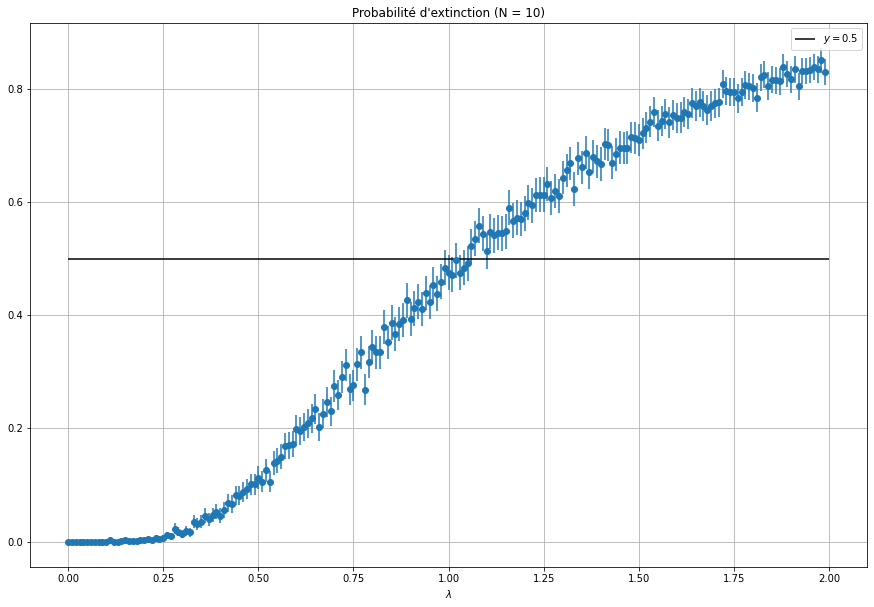

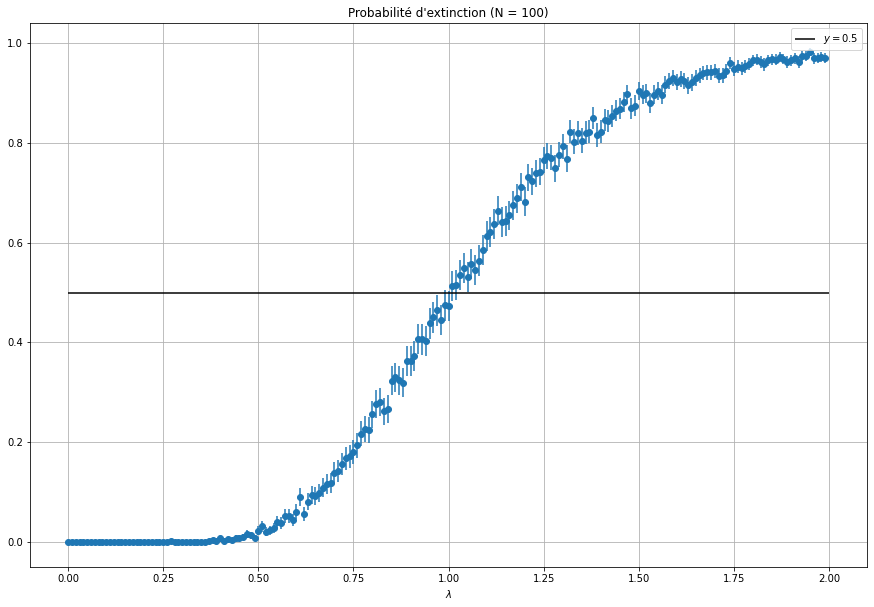

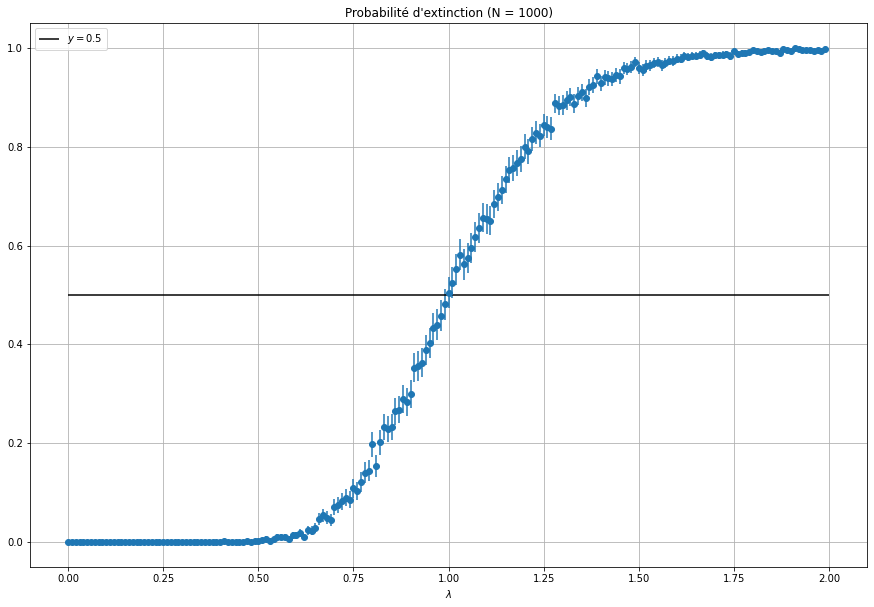

In [19]:
nb_iter = 1000
Ns = [10, 100, 1000]

for N in Ns:
    plot_extinction_prob(N, nb_iter)

(-1.0, 100.0)

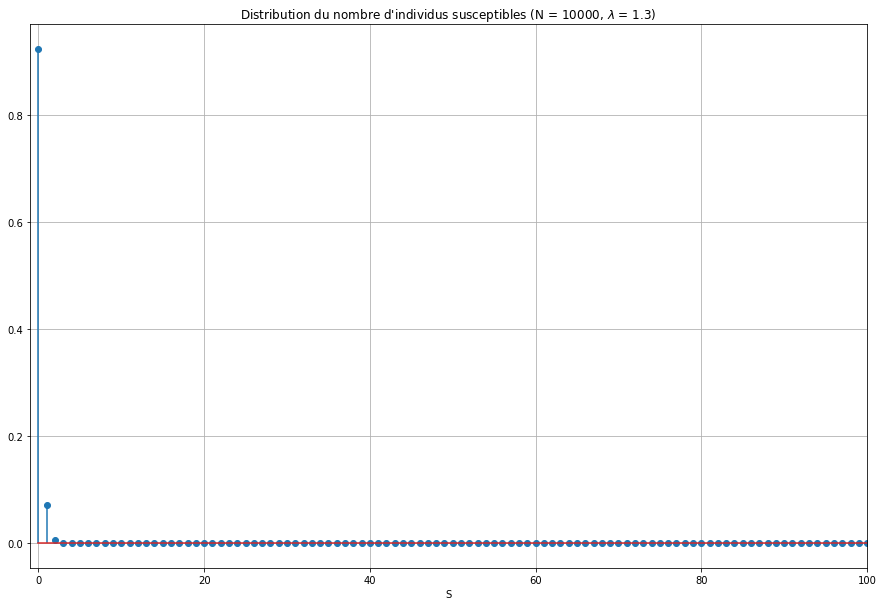

In [ ]:
N = 10000
nb_iter = 1000
rate = 1.3

plot_distrib_S(N, rate, nb_iter)
pl.xlim(-1, 100)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


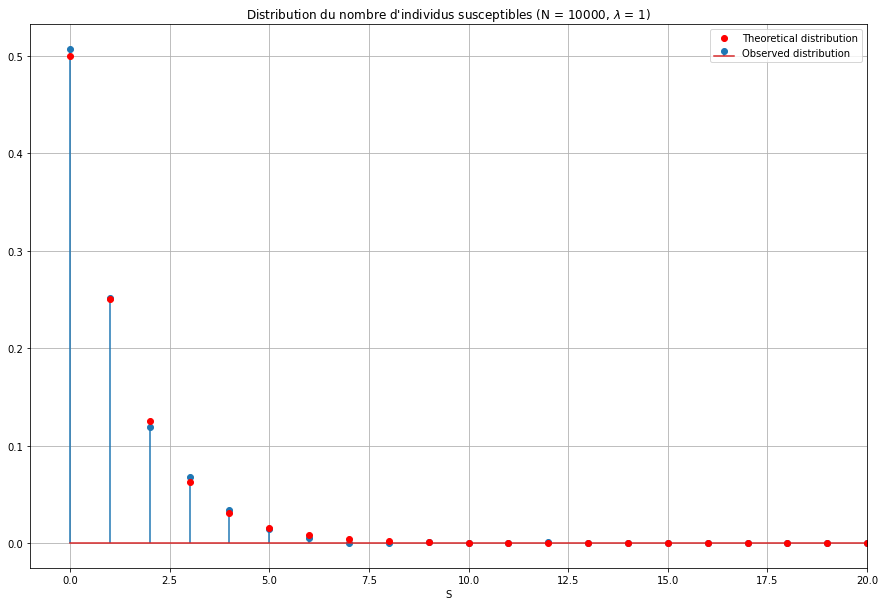

In [ ]:
N = 10000
nb_iter = 1000
rate = 1

plot_distrib_S(N, rate, nb_iter)
ints = np.arange(N + 1)
distrib_theo = 1 / 2 ** (ints + 1)
pl.plot(ints, distrib_theo, 'o', color = "red", label = "Theoretical distribution")
pl.xlim(-1, 20)
pl.legend()

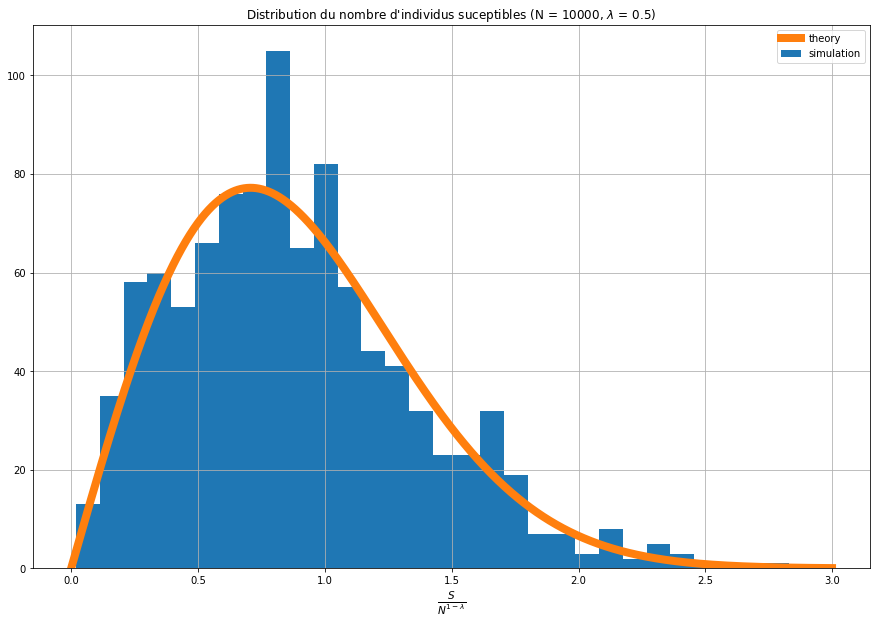

In [13]:
def plot_distrib_S_inf(N, rate, nb_iter):
    simuls = np.zeros(nb_iter)

    for i in range(nb_iter):
        S, _, _ = simulate_complete_graph(N, rate)
        simuls[i] = S / (N ** (1 - rate))
    
    x = np.arange(3000) / 1000
    y = x ** (1/rate - 1) * np.exp(-x ** (1/rate)) / rate * 90 

    pl.figure(figsize = (15, 10))
    pl.hist(simuls, 30, label = "simulation")
    pl.plot(x, y, label = "theory", linewidth = 8)
    pl.grid()
    pl.title("Distribution du nombre d'individus suceptibles (N = {}, $\lambda$ = {})".format(N, rate))
    pl.xlabel(r"$\frac {S} {N^{1-\lambda}}$", size = 15)
    pl.legend()

plot_distrib_S_inf(10000, 0.5, 1000)

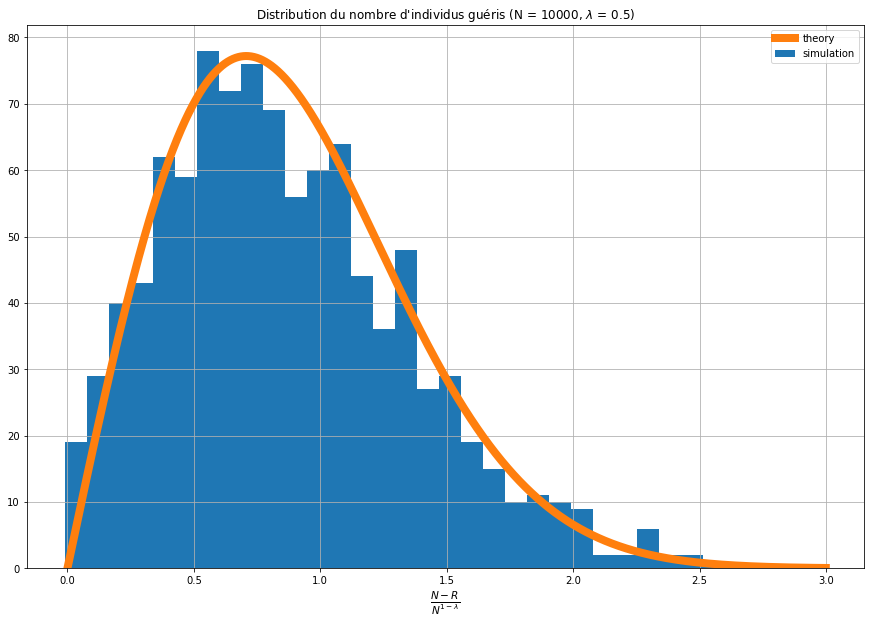

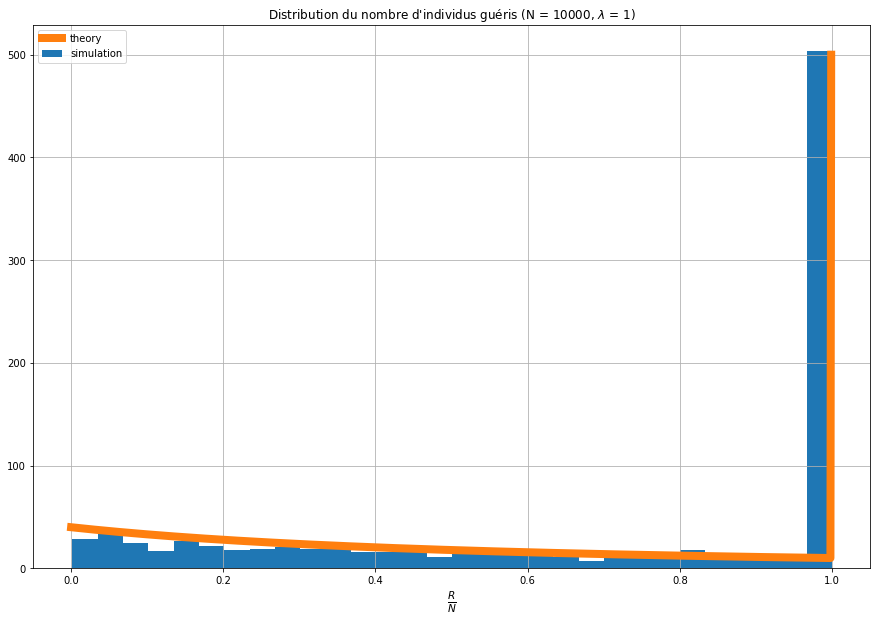

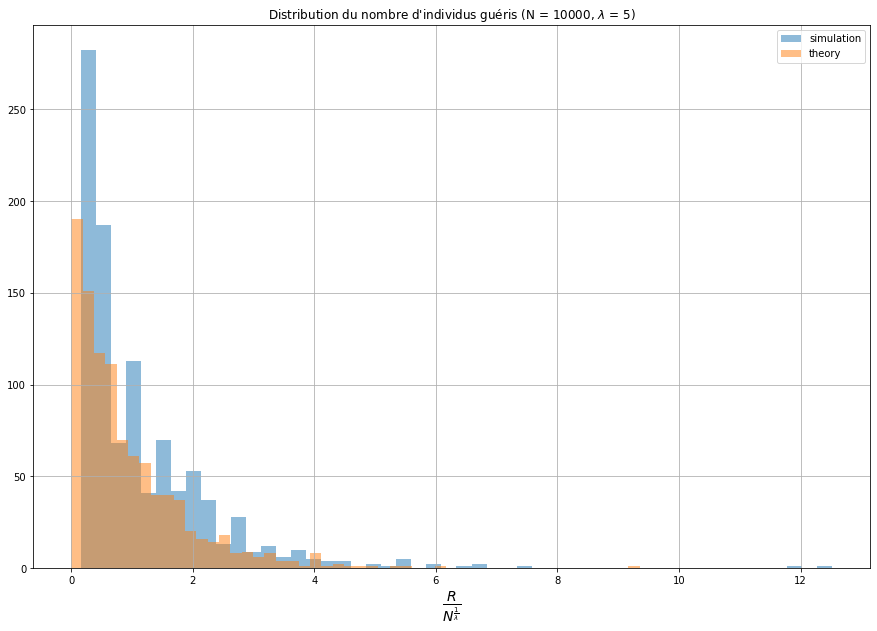

In [16]:
def plot_distrib_R_inf(N, rate, nb_iter):
    simuls = np.zeros(nb_iter)

    for i in range(nb_iter):
        _, _, R = simulate_complete_graph(N, rate)
        simuls[i] = (N - R) / (N ** (1 - rate))
    
    x = np.arange(3000) / 1000
    y = x ** (1/rate - 1) * np.exp(-x ** (1/rate)) / rate * 90

    pl.figure(figsize = (15, 10))
    pl.hist(simuls, 30, label = "simulation")
    pl.plot(x, y, label = "theory", linewidth = 8)
    pl.grid()
    pl.title("Distribution du nombre d'individus guéris (N = {}, $\lambda$ = {})".format(N, rate))
    pl.xlabel(r"$\frac {N-R}{N^{1-\lambda}}$", size = 15)
    pl.legend()

plot_distrib_R_inf(10000, 0.5, 1000)

def plot_distrib_R_crit(N, rate, nb_iter):
    simuls = np.zeros(nb_iter)

    for i in range(nb_iter):
        _, _, R = simulate_complete_graph(N, rate)
        simuls[i] = R / N

    x = np.arange(1000) / 1000
    y = 1 / (1 + x) ** 2 * 40
    y[-1] = 500
    
    pl.figure(figsize = (15, 10))
    pl.hist(simuls, 30, label = "simulation")
    pl.plot(x, y, label = "theory", linewidth = 8)
    pl.grid()
    pl.title("Distribution du nombre d'individus guéris (N = {}, $\lambda$ = {})".format(N, rate))
    pl.xlabel(r"$\frac {R} {N}$", size = 15)
    pl.legend()

plot_distrib_R_crit(10000, 1, 1000)

def plot_distrib_R_sup(N, rate, nb_iter):
    simuls = np.zeros(nb_iter)
    theo = np.zeros(nb_iter)

    for i in range(nb_iter):
        _, _, R = simulate_complete_graph(N, rate)
        simuls[i] = R / (N ** (1 / rate))
        p = rd.exponential(1)
        theo[i] = rd.exponential(p ** (1 / rate))
    
    
    pl.figure(figsize = (15, 10))
    pl.hist(simuls, 50, alpha = 0.5, label = "simulation")
    pl.hist(theo, 50, alpha = 0.5, label = "theory")
    pl.grid()
    pl.title("Distribution du nombre d'individus guéris (N = {}, $\lambda$ = {})".format(N, rate))
    pl.xlabel(r"$\frac {R} {N^{\frac {1} {\lambda}}}$", size = 20)
    pl.legend()

plot_distrib_R_sup(10000, 5, 1000)

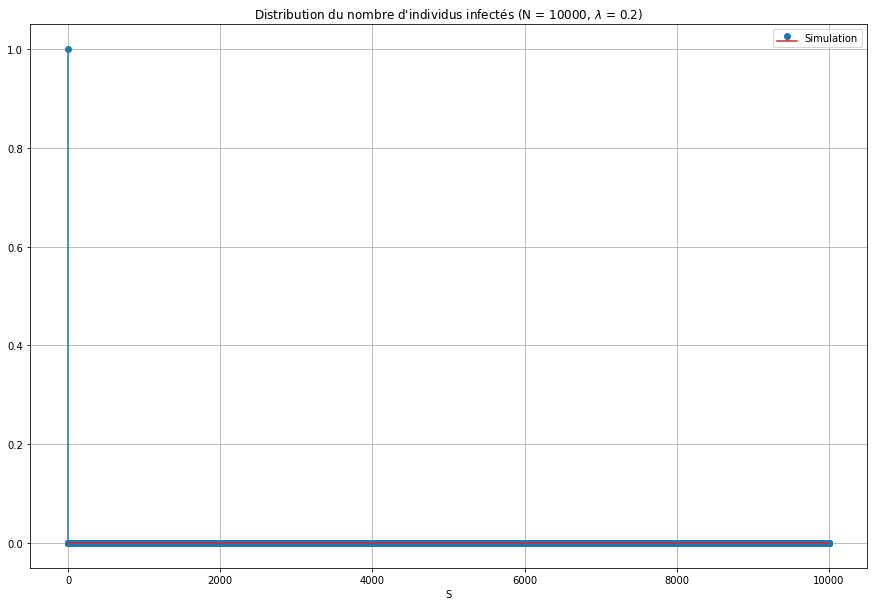

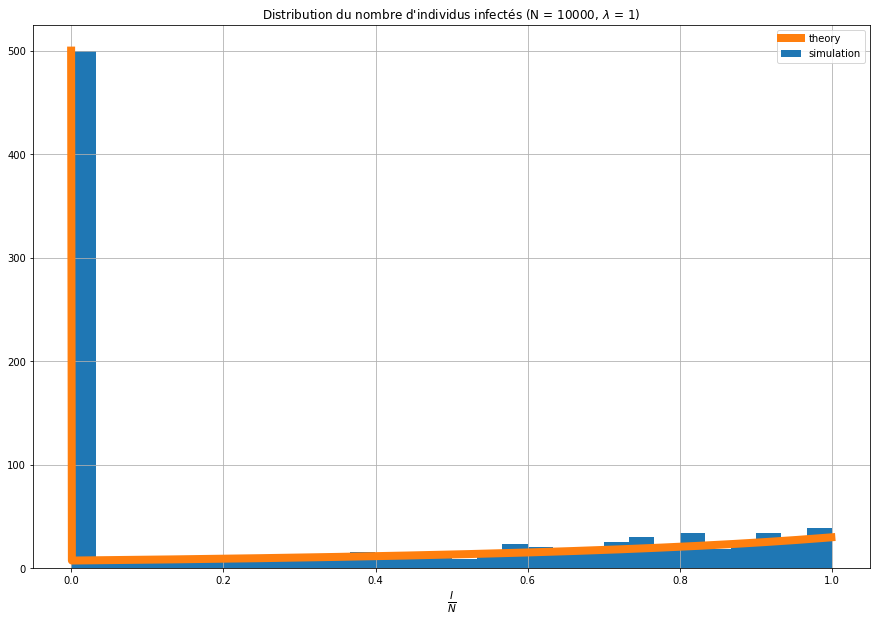

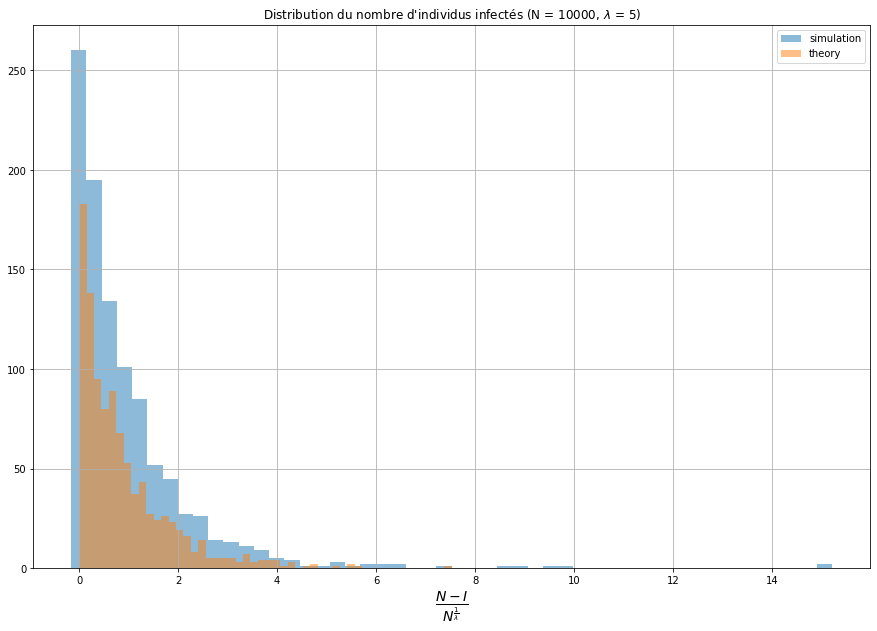

In [15]:
def plot_distrib_I_inf(N, rate, nb_iter):
    distrib = np.zeros(N + 1)

    for _ in range(nb_iter):
        _, I, _ = simulate_complete_graph(N, rate)
        distrib[I] += 1
    distrib /= nb_iter
    
    pl.figure(figsize = (15, 10))
    pl.stem(distrib, use_line_collection=True, label = "Simulation")
    pl.grid()
    pl.title("Distribution du nombre d'individus infectés (N = {}, $\lambda$ = {})".format(N, rate))
    pl.xlabel("S")
    pl.legend()

plot_distrib_I_inf(10000, 0.2, 1000)

def plot_distrib_I_crit(N, rate, nb_iter):
    simuls = np.zeros(nb_iter)

    for i in range(nb_iter):
        _, I, _ = simulate_complete_graph(N, rate)
        simuls[i] = I / N

    x = np.arange(1000) / 1000
    y = 1 / (2 - x) ** 2 * 30
    y[0] = 500
    
    pl.figure(figsize = (15, 10))
    pl.hist(simuls, 30, label = "simulation")
    pl.plot(x, y, label = "theory", linewidth = 8)
    pl.grid()
    pl.title("Distribution du nombre d'individus infectés (N = {}, $\lambda$ = {})".format(N, rate))
    pl.xlabel(r"$\frac {I} {N}$", size = 15)
    pl.legend()

plot_distrib_I_crit(10000, 1, 1000)

def plot_distrib_I_sup(N, rate, nb_iter):
    simuls = np.zeros(nb_iter)
    theo = np.zeros(nb_iter)

    for i in range(nb_iter):
        _, I, _ = simulate_complete_graph(N, rate)
        simuls[i] = (N - I) / (N ** (1 / rate))
        p = rd.exponential(1)
        theo[i] = rd.exponential(p ** (1 / rate))
    
    
    pl.figure(figsize = (15, 10))
    pl.hist(simuls, 50, alpha = 0.5, label = "simulation")
    pl.hist(theo, 50, alpha = 0.5, label = "theory")
    pl.grid()
    pl.title("Distribution du nombre d'individus infectés (N = {}, $\lambda$ = {})".format(N, rate))
    pl.xlabel(r"$\frac {N - I} {N^{\frac {1} {\lambda}}}$", size = 20)
    pl.legend()

plot_distrib_I_sup(10000, 5, 1000)